In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import time
import GPflow
import numpy as np
import time

In [2]:
# get the data
import pods, pandas as pd
data = pods.datasets.singlecell()
genes = data['Y']
labels = data['labels']
N = genes.shape[0]
G = genes.shape[1]
genes.describe()

,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,DppaI,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
count,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,...,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02
mean,2.089245e-08,2.400458e-08,3.011442e-08,2.009153e-08,1.416476e-08,2.661327e-08,1.828375e-08,2.329519e-08,2.993135e-08,2.077803e-08,...,2.180778e-08,2.146453e-08,2.077803e-08,2.585812e-08,2.473684e-08,2.670481e-08,2.009153e-08,2.231121e-08,2.263158e-08,2.606407e-08
std,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,...,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00
min,-2.997659e+00,-2.140030e+00,-1.768643e+00,-2.355953e+00,-4.420191e+00,-1.972546e+00,-2.493296e+00,-2.290915e+00,-1.641875e+00,-1.755517e+00,...,-2.246728e+00,-2.015028e+00,-2.960914e+00,-1.964500e+00,-2.033562e+00,-1.886886e+00,-2.238215e+00,-2.089612e+00,-1.825355e+00,-2.035440e+00
25%,-7.169942e-01,-7.796685e-01,-7.171038e-01,-9.337937e-01,-2.516838e-01,-6.446426e-01,-7.717112e-01,-8.545864e-01,-6.703301e-01,-1.018770e+00,...,-7.734272e-01,-9.343944e-01,-6.515803e-01,-7.255418e-01,-7.276985e-01,-8.376303e-01,-9.886838e-01,-9.197137e-01,-9.236930e-01,-7.673579e-01
50%,9.227372e-02,-1.782182e-01,-1.842611e-01,2.928931e-01,2.146358e-01,-1.353097e-01,2.772327e-01,-6.806050e-02,-2.415102e-01,1.097815e-01,...,7.709900e-03,8.293864e-02,-3.701860e-02,-1.972392e-01,-1.336842e-01,-2.656403e-01,2.828122e-01,-1.836380e-02,-1.127644e-01,-2.462695e-01
75%,6.808323e-01,6.245760e-01,3.312916e-01,8.234601e-01,6.738631e-01,4.854397e-01,8.213037e-01,9.125241e-01,4.854736e-01,9.259312e-01,...,8.608111e-01,8.312436e-01,6.177259e-01,1.082358e+00,5.329677e-01,9.967453e-01,8.099583e-01,1.022974e+00,8.257577e-01,6.422915e-01
max,2.490650e+00,3.564713e+00,2.627702e+00,1.687127e+00,1.569268e+00,3.427747e+00,1.826346e+00,1.729923e+00,2.780331e+00,1.671790e+00,...,1.709987e+00,4.489121e+00,3.565258e+00,1.655467e+00,2.231074e+00,2.104293e+00,4.187598e+00,1.808619e+00,2.208022e+00,2.270316e+00


In [3]:
stageCell = np.zeros(N)
stageN = np.zeros(N)
for i,l in enumerate(labels):
    stageCell[i] = int(l[:2])
    stageN[i] = np.log2(stageCell[i]) + 1

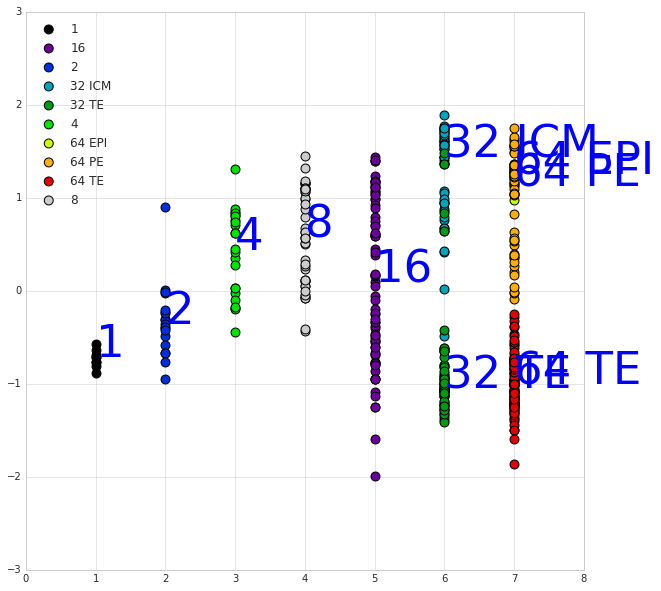

In [4]:
def plotGene(t,g,labels):
    import matplotlib.cm as cm
    labelLegend = np.unique(labels)
    with plt.style.context('seaborn-whitegrid'):
        colors = cm.spectral(np.linspace(0, 1, len(labelLegend)))
        plt.figure(figsize=(10, 10))
        for lab,c in zip(labelLegend,colors):
            y1 = t[labels == lab]
            y2 = g[labels == lab]
            plt.scatter(y1,y2,label=lab, c=c,s=80)
            plt.text(np.median(y1),np.median(y2),lab, fontsize=45, color='blue')
        plt.legend(loc='upper left')
plotGene(stageN, genes['Id2'].values, labels)

In [25]:
import GPy
Y = genes.values
print Y.shape
D = Y.shape[1]
Q = 2
ct = stageN-3

(437, 48)


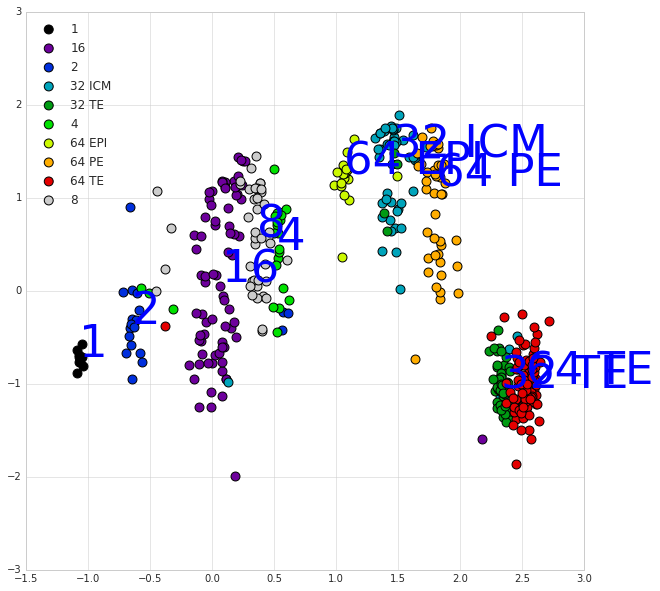

In [27]:
# Single D PT inference with pseudotimes
np.random.seed(0)

time_kernel = GPy.kern.RBF(1)
time_model = GPy.models.BayesianGPLVM(Y, 1, kernel=time_kernel, X=np.expand_dims(ct,1), X_variance=1.*np.ones( (N,1)))

for i in range(N):
    time_model.X.mean[i, [0]].set_prior(GPy.priors.Gaussian(ct[i], 1), warning=False)
    
time_model.likelihood.fix(Y.std()/100)
time_model.optimize(messages=1, max_iters=100)
time_model.likelihood.unfix()
time_model.optimize(messages=1)    

plotGene(time_model.X.mean.values, genes['Id2'].values, labels)

In [53]:
# Additive kernel
k1=GPy.kern.RBF(1,ARD=True,active_dims=[0])
k2=GPy.kern.RBF(1,ARD=True,active_dims=[1])

priormean=np.hstack([np.expand_dims(ct,1),np.zeros( (N,1))])
priorstd= 0.3*np.ones((N,2))

print priormean.shape
print priorvar.shape

np.random.seed(0)
# import GPy.util.initialization import initialize_latent
Xinit, varX = GPy.util.initialization.initialize_latent('PCA', 2, Y)
# draw from prior for initial condition? PCA is not a good initialisation because it messes up ordering
for i in range(N):
    Xinit[i,0] = priormean[i,0] + priorstd[i,0]*np.random.randn(1)
    
print ct[:30]
print np.round(Xinit[:30,0])

(437, 2)
(437, 2)
[-2. -2. -2. -2. -2. -2. -2. -2. -2. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.]
[-2. -2. -2. -2. -2. -3. -2. -2. -2. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -0. -1. -1. -0. -1. -1. -1.  0.  0.]


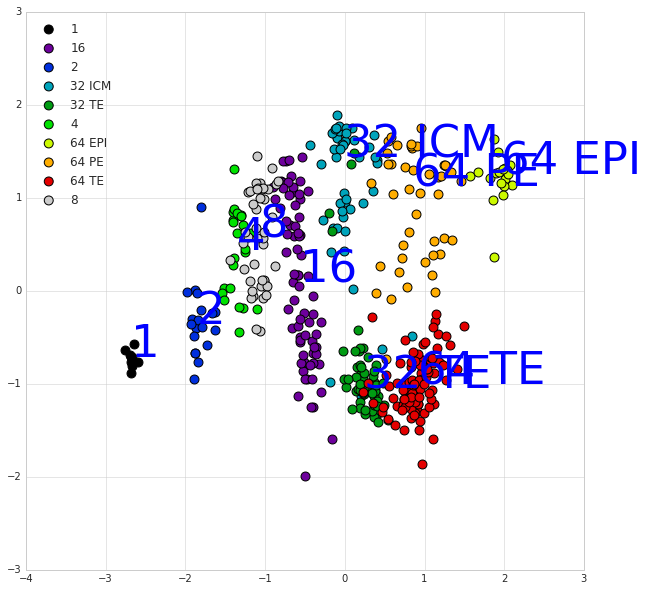

In [54]:
time_kernel = k1+k2
time_model = GPy.models.BayesianGPLVM(Y, 2, kernel=time_kernel, X=Xinit )

time_model.likelihood.fix(Y.std()/100)
time_model.optimize(messages=1, max_iters=100)
time_model.likelihood.unfix()
time_model.optimize(messages=1)    

plotGene(time_model.X.mean.values[:,0], genes['Id2'].values, labels)

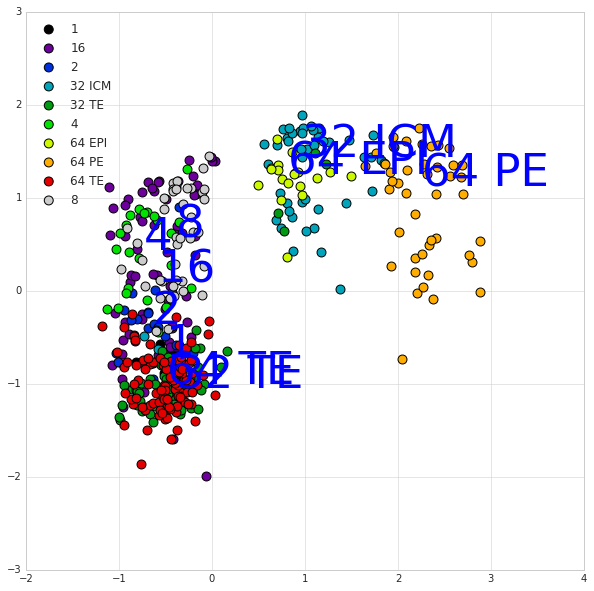

In [55]:
plotGene(time_model.X.mean.values[:,1], genes['Id2'].values, labels)

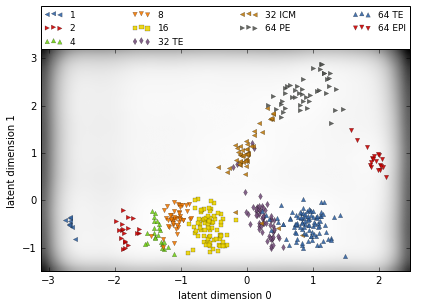

In [56]:
f=plt.figure(figsize=(10,10))
time_model.plot_latent(labels=labels)

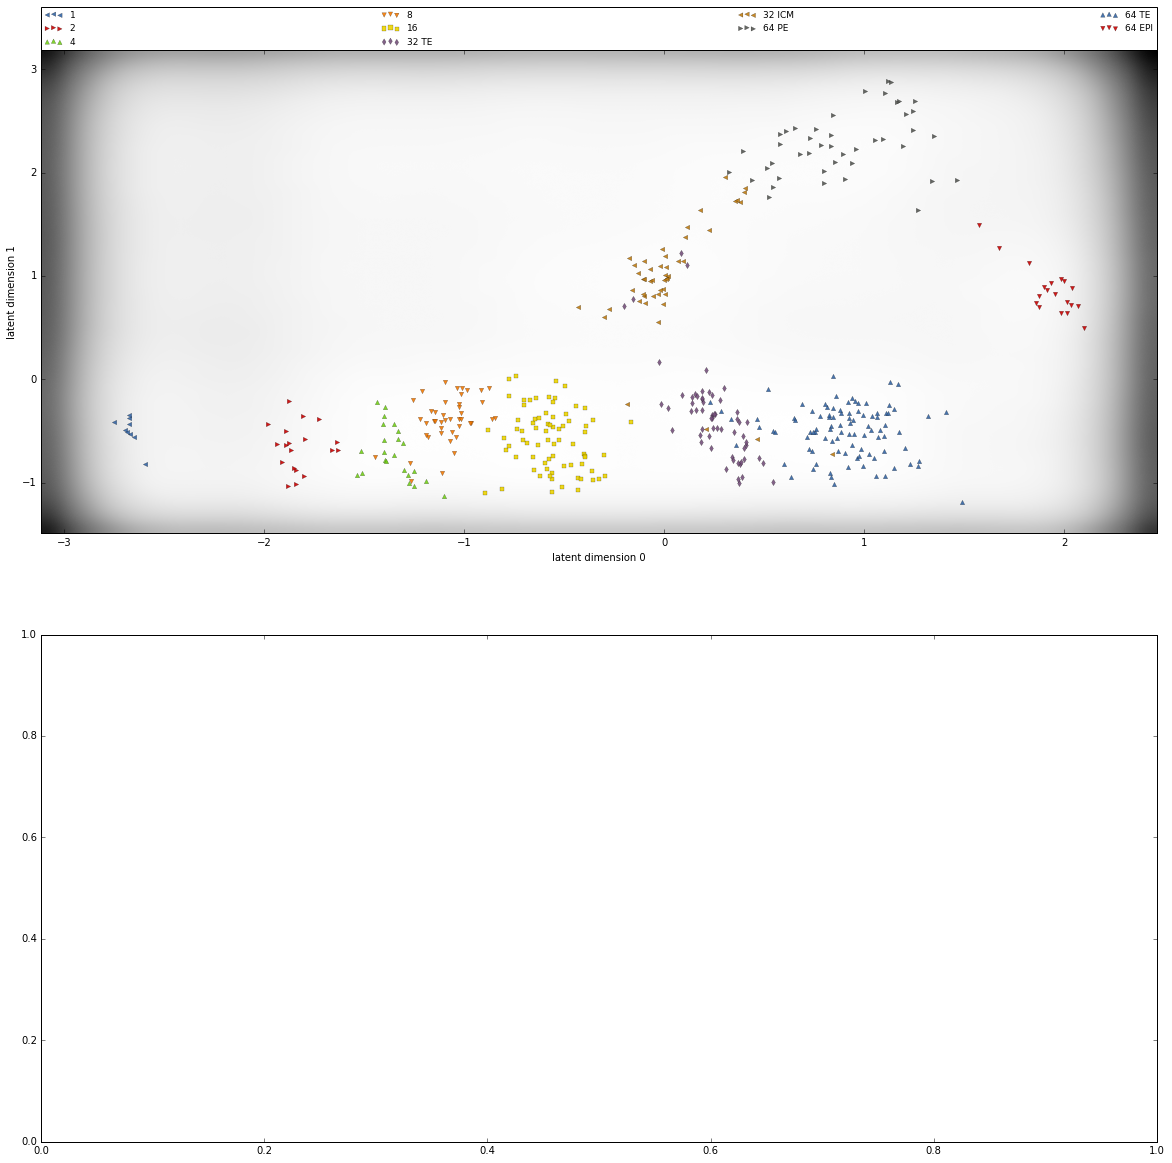

In [63]:
fig, (latent_axes, sense_axes) = plt.subplots(2, 1, figsize=(20,20))
time_model.plot_latent(ax=latent_axes, labels=labels)

In [ ]:
# check to see prior has effect on objective function
m.X.mean.set_prior(GPy.priors.Gaussian(0,1))
print m.objective_function()
m.X.mean.set_prior(GPy.priors.Gaussian(0,100))
print m.objective_function()
m.X.mean.set_prior(GPy.priors.MultivariateGaussian(priormean,priorvar) )
print m.objective_function()

In [ ]:
# mQmix= GPy.models.BayesianGPLVM(Y, Q, kernel=k1+k2, num_inducing=50)
np.random.seed(0)
m.likelihood.fix(Y.std()/100)
m.optimize(messages=0, max_iters=100)

# mQmix.likelihood.unfix()
# mQmix.optimize(messages=1)

In [ ]:
print m.objective_function()

In [ ]:
mQmix.plot_scatter(labels=labels, projection='2d')

In [ ]:
mQmix.kern.plot_ARD()